---
# Drzewa decyzyjne #
---
Autor: Anna Dawid
Korekta: Rafał Masełek

## 1. Pobranie i analiza danych uczących ##
Będziemy dziś pracować na [zbiorze danych](http://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28diagnostic%29) uzyskanych z biopsji (aspiracyjnej cienkoigłowej) piersi. Zadaniem naszym jest wytrenowanie klasyfikatora, który po cechach wyników biopsji będzie klasyfikował guz jako łagodny lub złośliwy.

In [1]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Gdy znacie zestaw danych i chcecie od razu przejść do treningu, opcja 'return_X_y = True' jest dla Was!
#X, y = load_breast_cancer(return_X_y=True)
# Ale to nasz pierwszy raz z tym zestawem danych, więc sprawdźmy co jest w środku. 

cancer = load_breast_cancer()

In [2]:
#Wykorzystajcie analizę danych zrobioną dla irysów w notebooku z naiwnym klasyfikatorem Bayesa.
# Sprawdźcie opis zestawu danych
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [3]:
# wypiszcie nazwy klas
...
# wypiszcie nazwy cech (kolumn)
...

['malignant' 'benign']
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [4]:
# Sprawdźcie ile jest przykładów z obu klas
...

malignant: 212
benign: 357


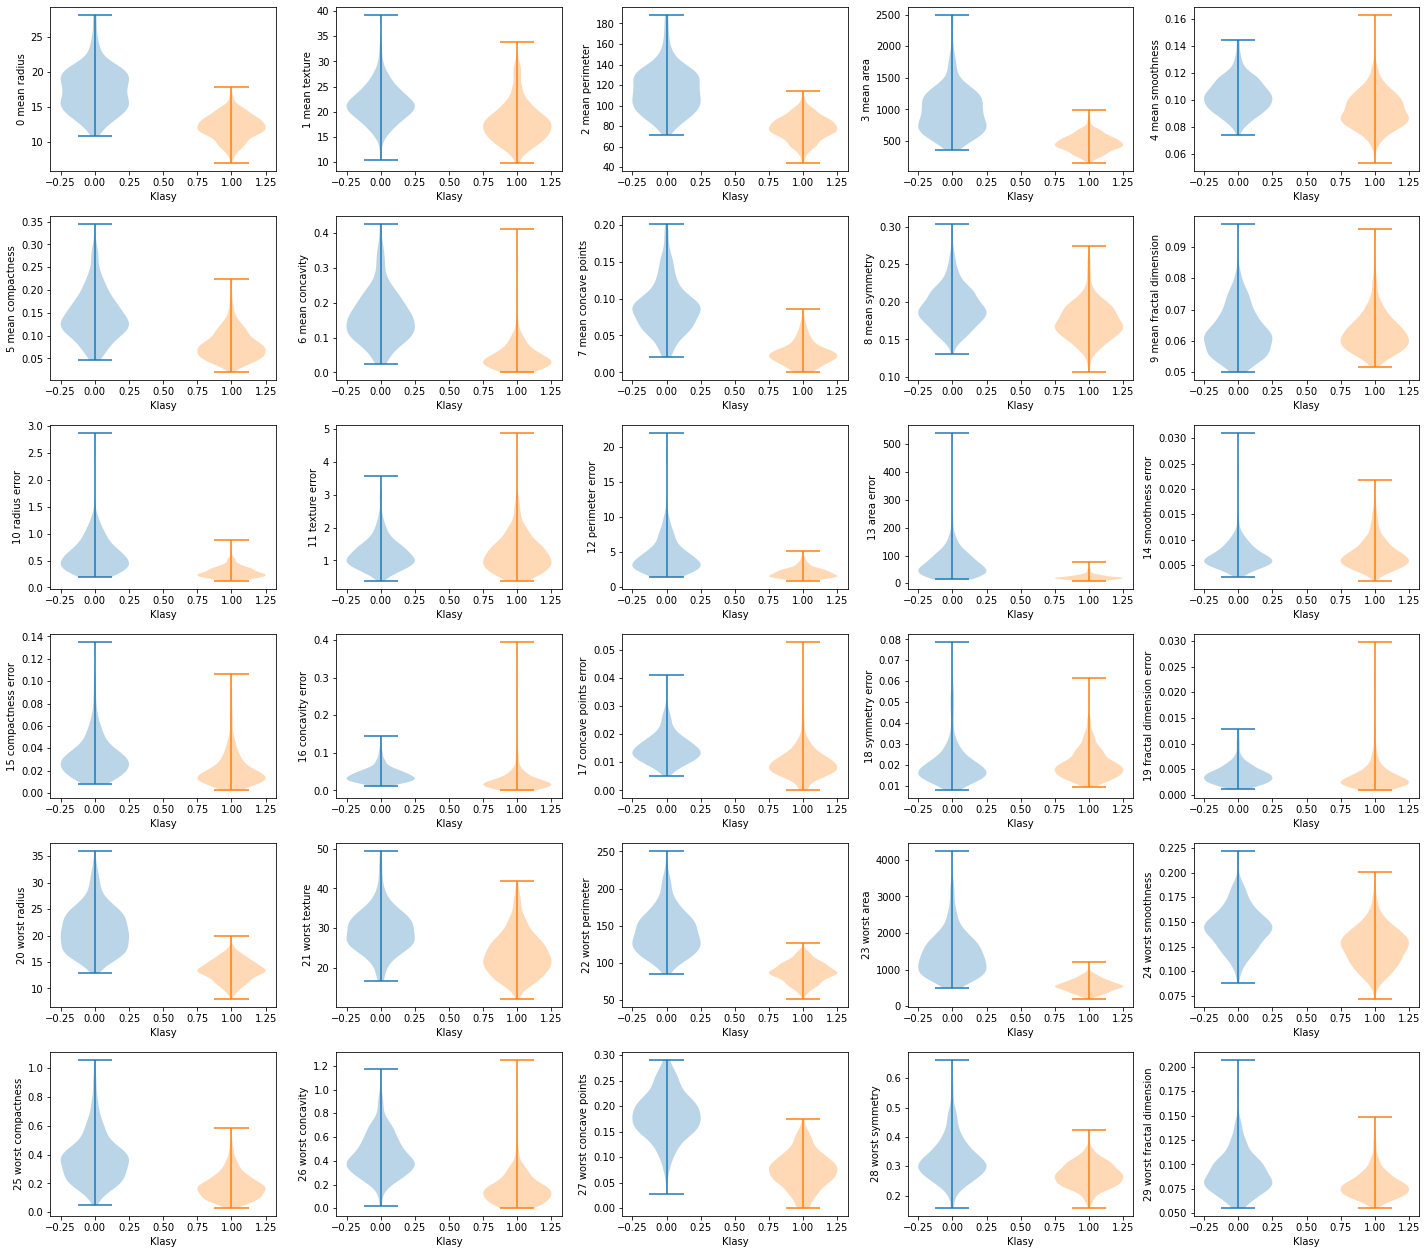

In [5]:
# Zróbcie violinploty dla wszystkich cech
# Co o nich myślicie? Czy sprawią jakiś problem? Czy powinniśmy coś z nimi zrobić?


# tworzymy obiekt typu figure
plt.figure(figsize=(20,20))
# iterujemy po cechach
for f, f_name in enumerate(cancer['feature_names']):
    nf = len(cancer['feature_names'])
    # dodajemy podwykres
    plt.subplot(nf//5+1,5,f+1)
    # narysuj wykresy dla wszystkich klas
    # użyj parametru "positions", żeby właściwie umiejscowić klasy na osi OX
    ...
    # dodajemy etykiety osi
    plt.ylabel(str(f) + ' ' + f_name)
    plt.xlabel('Klasy')
# magiczna formułka rozkładająca wykresy w estetyczny sposób tak, żeby nie nachodziły na siebie
plt.tight_layout()
# pokazujemy wykres
plt.show() 

### obserwacje: 
1. Cechy mają bardzo różne skale wartości, niektóre są rzędu 1e-1, inne 1e3, ale to nie problem, bo używamy drzew.
2. Rozkłady niektórych cech są podobne -> korelacja? 

<Figure size 432x288 with 0 Axes>

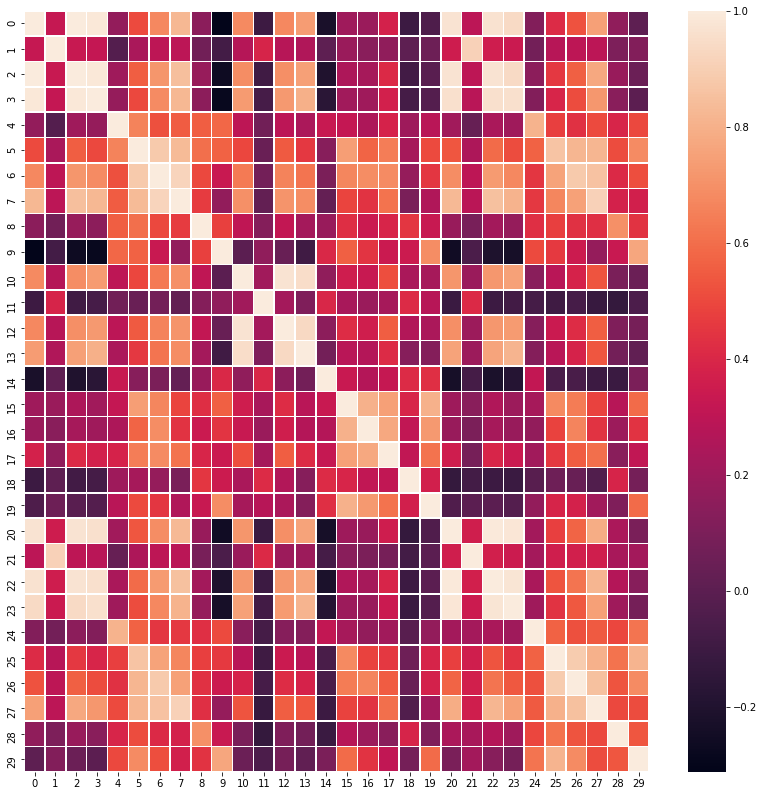

In [6]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
# Zróbcie wykres korelacji między cechami (tym razem prawdziwej korelacji ;) nie jak w irysach!
# X zawiera Wasze dane uczące
X, y = load_breast_cancer(return_X_y=True)

plt.figure()
f, ax = plt.subplots(figsize=(14,14))
# użyj np.corrcoef aby policzyc współczynniki reprezentujące korelację miedzy cechami
# zwróc uwagę na parametr "rowvar"
corr = ...
# użyj sns.heatmap aby graficznie przedstawić korelację
# dla większej czytelności ustaw "linewidths=.5"
corr_plot = ...

# Czego się dowiedzieliście z tego wykresu? 

In [7]:
from sklearn.model_selection import train_test_split

# Podziel dane na treningowe i testowe (80:20)
X_train, X_test, y_train, y_test = ...


## 2. Importujemy klasyfikator w postaci drzewa decyzyjnego ##
W bibliotece scikit-learn drzewa decyzyjne implementowane są przez klasę [DecisionTreeClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier). Szczegóły implementacji opisane są [tutaj](https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use).

Najprostszy przykład:

In [8]:
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

Po dopasowaniu można przewidywać przynależność nowych przykładów:

In [9]:
# punkt blisko (0,0)
print(clf.predict([[0.3, 0.3]])[0])
# punkt blisko (1,1)
print(clf.predict([[0.7, 0.7]])[0])
# punkty blisko środka
print(clf.predict([[0.49, 0.49]])[0])
print(clf.predict([[0.51, 0.51]])[0])

0
1
0
1


Poniższa komórka zwizualizuje nam co się tak na prawdę stało.

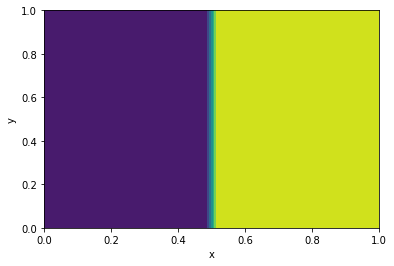

In [10]:
N = 30
points = np.linspace(0.0, 1.0, N)
xx, yy = np.meshgrid(points, points)
zz = np.zeros((N, N))
for ix in range(N):
    for iy in range(N):
        zz[ix,iy] = clf.predict([[ xx[ix, iy], yy[ix, iy] ]])[0]

plt.contourf(xx, yy, zz)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### Drzewo dokonało regresji -> podzieliło przestrzeń cech (x i y) na obszary odpowiadające poszczególnym klasom

Albo estymować prawdopodobieństwo przynależności do klas:

In [ ]:
print( clf.predict_proba( [[2., 2.]] ) )
print( clf.predict_proba( [[2., 0.]] ) )
print( clf.predict_proba( [[0., 2.]] ) )
print( clf.predict_proba( [[0.5, 0.5]] ) )

## 3. Klasyfikacja guzów i wizualizacja drzewa ##

In [12]:
# stwórz obiekt-klasyfikator drzewa decyzyjnego z domyślnymi parametrami
clf = ...
# dofituj drzewo do danych o raku piersi
...

DecisionTreeClassifier()

Po wytrenowaniu można zilustrować wynik za pomocą narzędzia Graphiz (wymaga to zainstalowania w systemie tego narzędzia), oraz doinstalowania do pythona biblioteki pydot:

In [13]:
!pip3 install graphviz pydotplus

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8 -m pip install --upgrade pip' command.


In [14]:
import pydotplus
import io
from IPython.display import Image
from sklearn.tree import  export_graphviz

dot_data = io.StringIO()
export_graphviz(clf, out_file=dot_data,
                    filled=True, rounded=True,
                    rotate=False,
                    node_ids = True,
                    special_characters=True,
                    leaves_parallel=False,
                    feature_names = cancer.feature_names,
                    class_names=cancer.target_names,
                   )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree_hor.png')

True

Można też podejrzeć wyniki w pythonie:

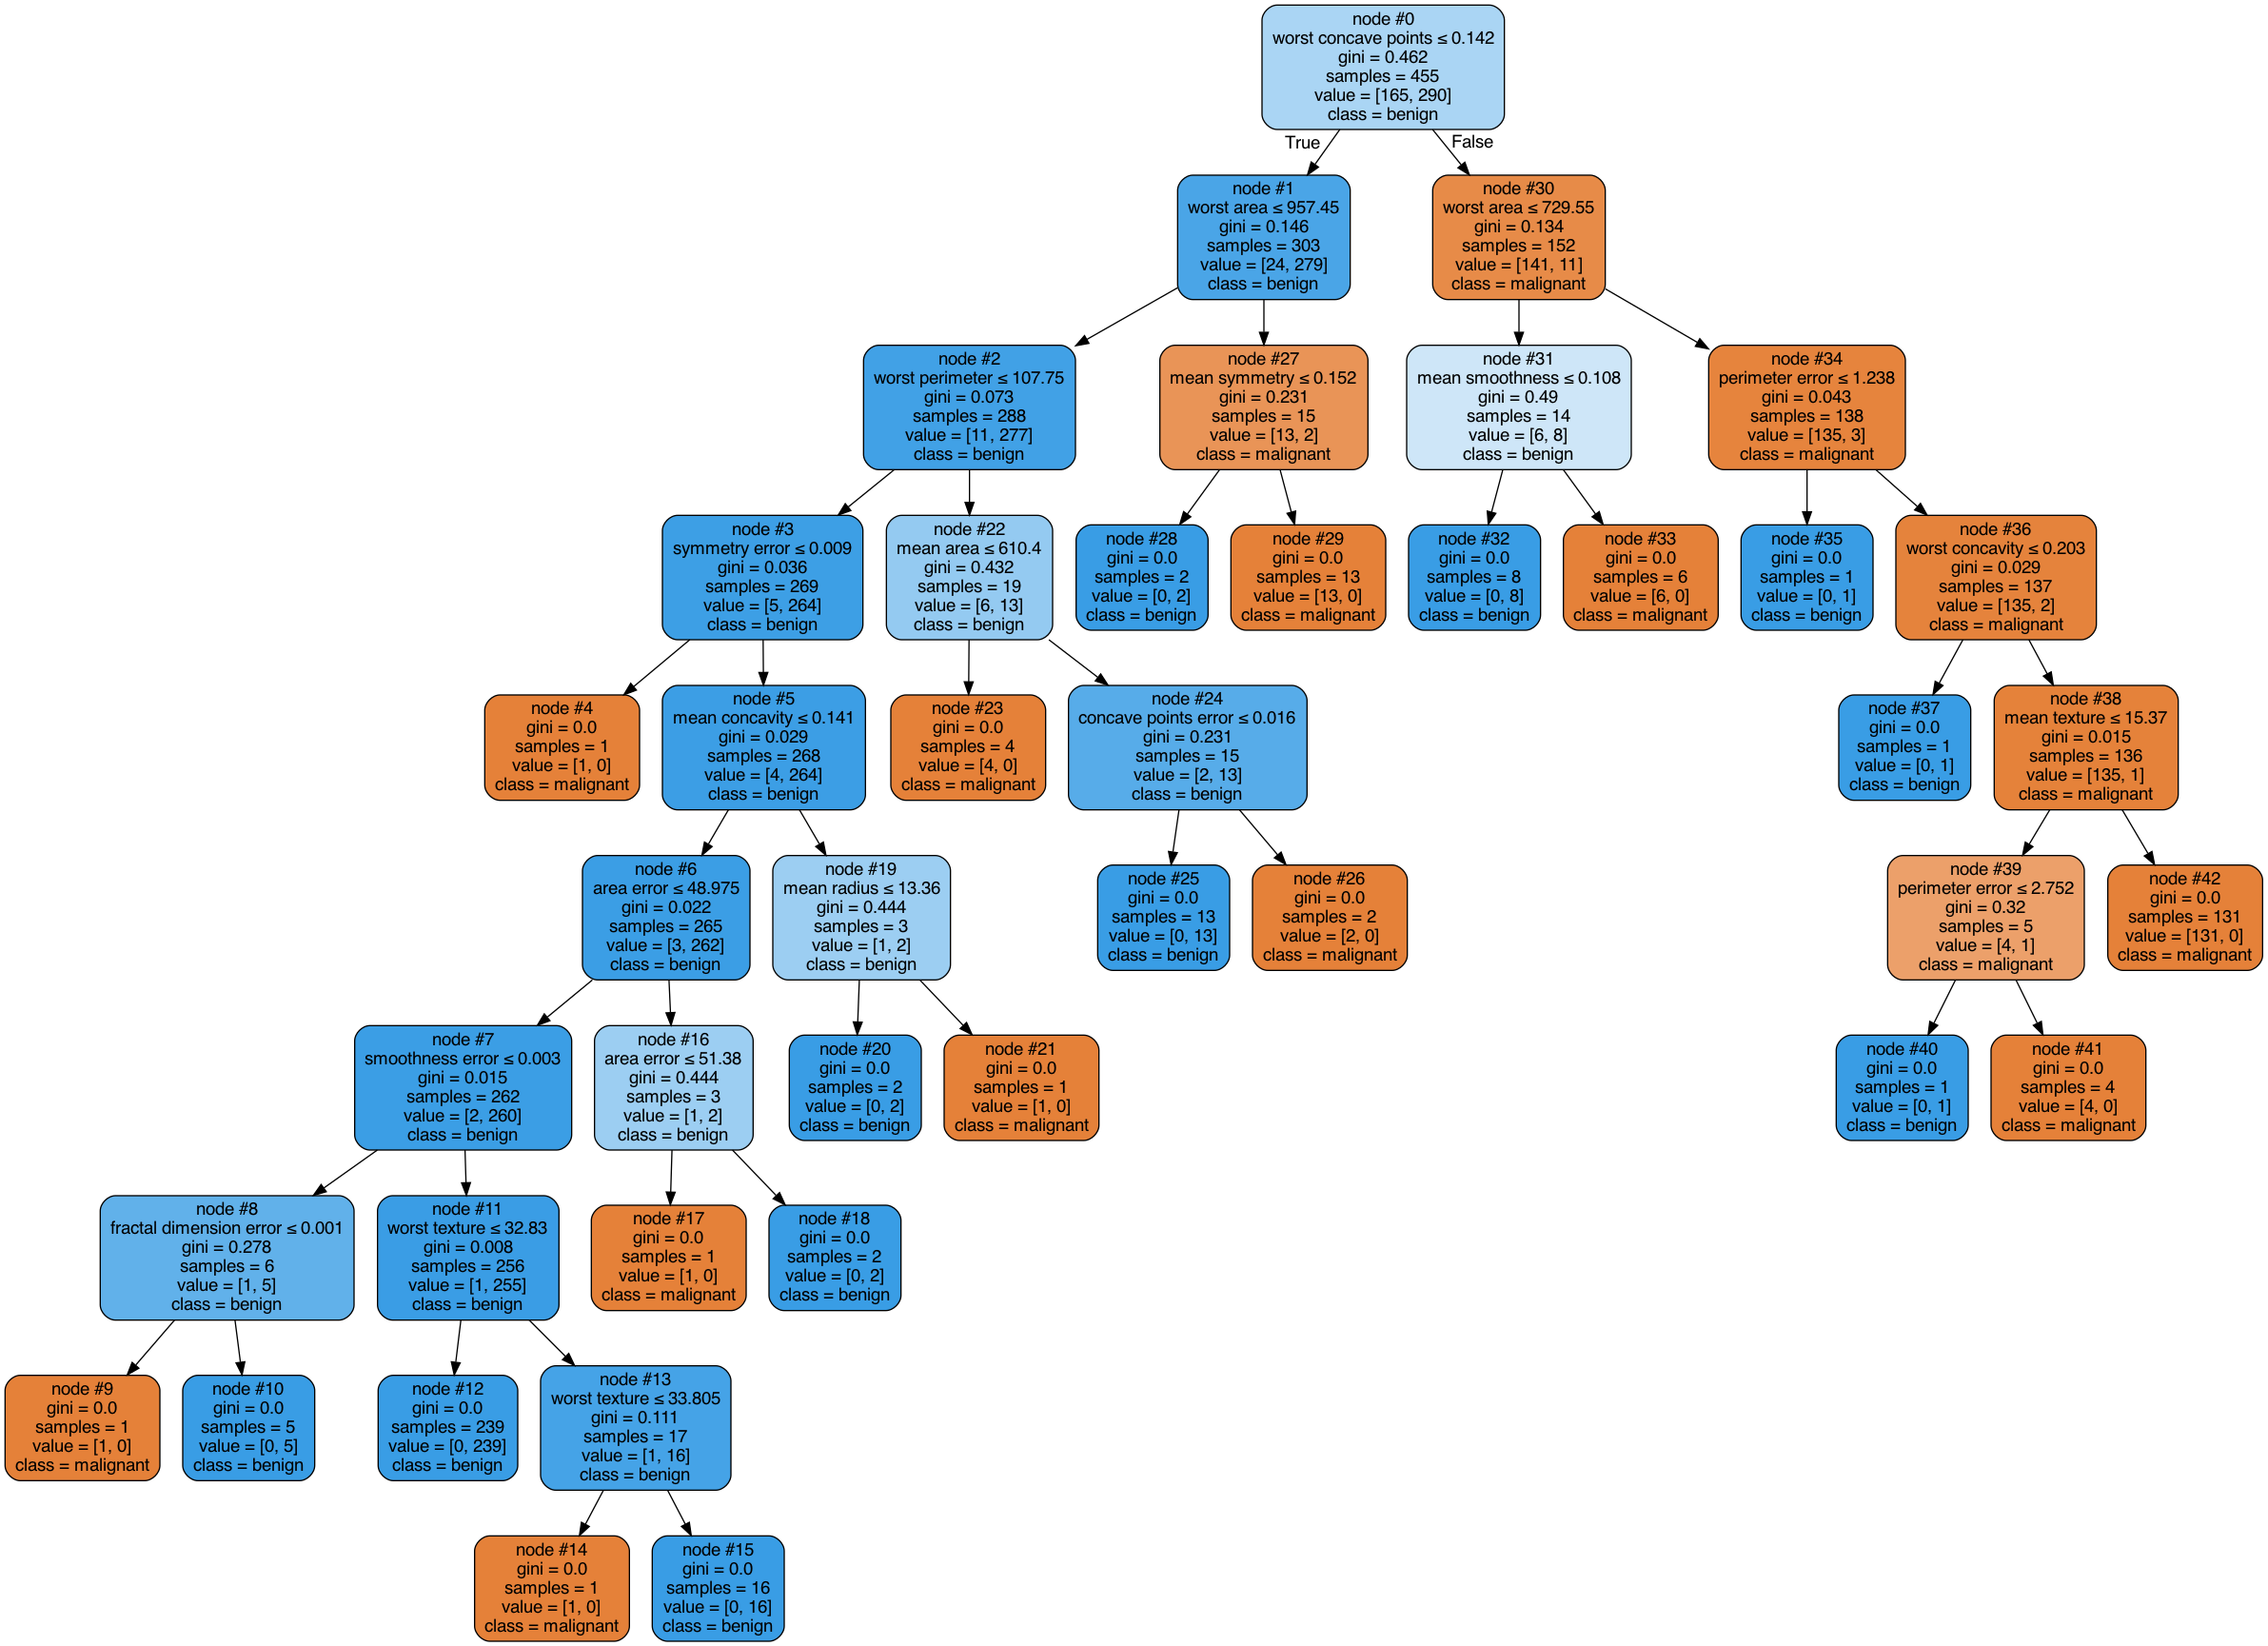

In [15]:
# Display in jupyter notebook
from IPython.display import Image
# from file
# Image(filename = 'tree_hor.png')
# from graph object
Image(graph.create_png())

Czym jest "Gini", "samples", "value" oraz "class"? Co oznaczają kolory?

[Text(213.94008620689655, 206.56799999999998, 'worst concave points <= 0.142\ngini = 0.462\nsamples = 455\nvalue = [165, 290]'),
 Text(162.34913793103448, 184.824, 'worst area <= 957.45\ngini = 0.146\nsamples = 303\nvalue = [24, 279]'),
 Text(128.4362068965517, 163.07999999999998, 'worst perimeter <= 107.75\ngini = 0.073\nsamples = 288\nvalue = [11, 277]'),
 Text(95.2448275862069, 141.336, 'symmetry error <= 0.009\ngini = 0.036\nsamples = 269\nvalue = [5, 264]'),
 Text(83.7, 119.592, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(106.78965517241379, 119.592, 'mean concavity <= 0.141\ngini = 0.029\nsamples = 268\nvalue = [4, 264]'),
 Text(75.04137931034482, 97.848, 'area error <= 48.975\ngini = 0.022\nsamples = 265\nvalue = [3, 262]'),
 Text(46.179310344827584, 76.10399999999998, 'smoothness error <= 0.003\ngini = 0.015\nsamples = 262\nvalue = [2, 260]'),
 Text(23.089655172413792, 54.360000000000014, 'fractal dimension error <= 0.001\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Tex

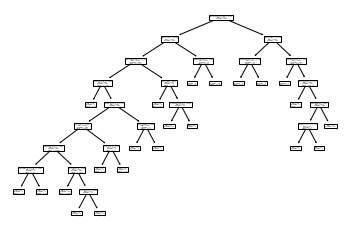

In [16]:
# Alternatywą jest użycie wbudowanej metody 'plot_tree', ale wydaje mi się mniej przyjazna:
tree.plot_tree(clf, feature_names=cancer.feature_names)

Oczywiście oceniamy jakość tej klasyfikacji:

In [17]:
# Raport jakości klasyfikacji + Wasze ulubione miary jakości.
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = clf.predict(X_test)

print("Classification report:")
print(...)

print("Confusion matrix:")
print(...)

print("Accuracy score:")
print(...)

Classification report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.89        47
           1       0.94      0.90      0.92        67

    accuracy                           0.90       114
   macro avg       0.90      0.91      0.90       114
weighted avg       0.91      0.90      0.90       114

Confusion matrix:
[[43  4]
 [ 7 60]]
Accuracy score:
0.9035087719298246


Co o niej myślicie? A sprawdźcie na wszelki wypadek klasyfikację danych treningowych?

In [18]:
y_pred = clf.predict(X_train)

print("Classification report:")
print(...)

print("Confusion matrix:")
print(...)

print("Accuracy score:")
print(...)

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       165
           1       1.00      1.00      1.00       290

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455

Confusion matrix:
[[165   0]
 [  0 290]]
Accuracy score:
1.0


#### Co to oznacza? :)

Sprawdźmy jeszcze które cechy są najważniejsze przy klasyfikacji

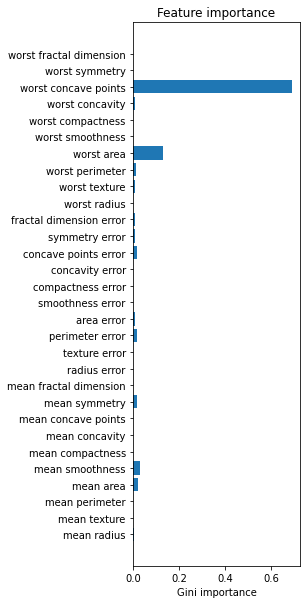

In [19]:
plt.figure(figsize=(3,10))
# clf zawiera pole w którym jest znaczenie (ang. importance) wszystkich cech
# sprawdz w dokumentacji jak nazywa się to pole i wpisz do fi
fi = ...
# wizualizujemy znaczenie cech
plt.barh(cancer.feature_names, fi)
plt.title('Feature importance')
plt.xlabel('Gini importance')
plt.show()

## 4. Regularyzacja drzewa przez przycinanie ##

A teraz crème de la crème uczenia maszynowego, czyli regularyzacja. Pamiętacie na czym ogólnie polega?

W przypadku drzew decyzyjnych polega przede wszystkim na:
- przycinaniu gałęzi i liści (czyli zmniejszaniu liczby węzłów) przez kontrolę parametru min_samples_leaf: mianowicie daje dolny limit na jak drobne gałązki może drzewo tworzyć. Jeśli kolejna gałązka miałaby rozpatrywać tylko liczbę przykładów < min_sample_leaf, to nie tworzy się. Domyślnie, min_sample_leaf = ?
- ograniczaniu głębokości drzewa, czyli jak wiele rozgałęzień może się stworzyć. Domyślnie max_depth = None. Co to znaczy? Patrz [tu](https://scikit-learn.org/0.22/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier).

Macie dwa wyjścia. Po pierwsze, poszukać optymalnych hiperparametrów ręcznie, jak ostatnio robiliście. Po drugie, skorzystać (z rozwagą!) z gotowej metody cost_complexity_pruning_path, w której bawicie się jednym parametrem 'cost complexity parameter', czyli ccp_alpha. Tutaj macie [tutorial](https://scikit-learn.org/0.22/auto_examples/tree/plot_cost_complexity_pruning.html). Jeśli będziecie korzystać z tej funkcji, to proszę o bogate komentarze, co się po drodze dzieje :)

Ostatecznym wynikiem ma być uzyskanie optymalnego drzewa oraz jego wizualizacja wraz z raportem klasyfikacji i macierzą pomyłek.

Powodzenia! :)

In [20]:
# OPCJA ZNAJOMA
# 1. Stwórz klasyfikator drzewa z odpowiednimi parametrami i przetestuj jego działanie
# 2. Zmień parametry i powtórz
# 3. Użyj pętli, aby sprawdzić rózne wartości i znaleźć optymalne, np. dla jakich wartości parametrów accuracy jest największe?
# 4. Narysuj accuracy w funkcji min_sample_leaf i max_depth

In [21]:
...

Ellipsis

In [22]:
# OPCJA NOWA
# Poprowadzę was krok po kroku

In [23]:
# użyj metody naszego modelu,
# o nazwie cost_complexity_pruning_path żeby znaleźć ścieżkę przycinania dla zbioru uczącego
path = ...
# z obiektu path wyjmij wartości parametrów alpha i "nieczystości"
ccp_alphas, impurities = ...

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

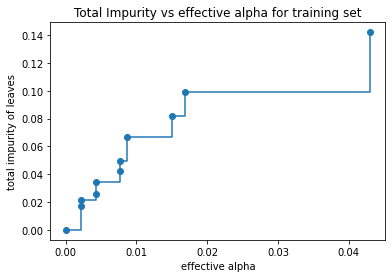

In [24]:
fig, ax = plt.subplots()
# narysuj wykres punktowo-schodkowy (patrz dokumentacja) nieczystości w funkcji alpha
ax.plot(...)
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [25]:
clfs = []
# iteruj w pętli po wartościach parametrów alpha
# dla każdego alpha stwórz drzewo, dofituj i dodaj model do listy clfs
...
    
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.32027199074911666


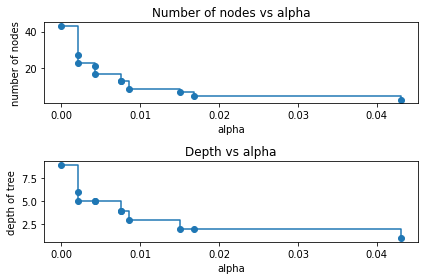

In [26]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
# policzymy ilość węzłów w naszych modelach
node_counts = [clf.tree_.node_count for clf in clfs]
# i maksymalną "głębokość" 
depth = [clf.tree_.max_depth for clf in clfs]
# narysujemy powyższe wartości na wykresach punktowo-schodkowych
fig, ax = plt.subplots(2, 1)
# naryj liczbę węzłów w funkcji współczynników alpha
ax[0].plot(...)
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
# naryj głębokość w funkcji współczynników alpha
ax[1].plot(...)
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

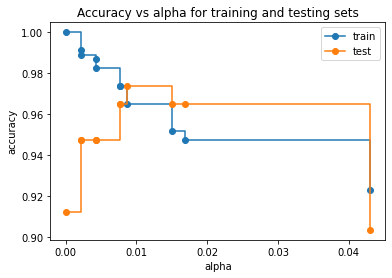

In [27]:
# Teraz rusyjemy accuracy w funkcji alpha dla zbiorów uczącego i testowego
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
# narysuj accuracy dla zbioru uczącego
ax.plot(...)
# narysuj accuracy dla zbioru testowego
ax.plot(...)
ax.legend()
plt.show()

## Zadanie 1.
Bazując na powyższym kodzie, zbadaj zależność miary F1 od parametru:
- głębokości drzewa (DEPTH),
- liczby cech wykorzystanych w klasyfikacji (MAX_FEAT).

Co powinniśmy mieć z tyłu głowy dobierając rozmiar drzewa?

In [28]:
...

Ellipsis

## Zadanie 2.
Stwórz drzewo z optymalnymi parametrami znalezione wcześniej. Ustaw wagi dla próbek tak, żeby ważona suma wszystkich próbek obu klas była taka sama, tzn. jeżeli masz 10 próbek klasy A i 5 próbek klasy B, to możesz dać próbkom z klasy A wagę 0.5 a próbkom z klasy B wagę 1.0. 
Dla takiego drzewa sprawdź jakość klasyfikacji i porównaj z drzewem bez wag.

In [29]:
...

Ellipsis

## Zadanie 3. ##
Na podstawie [tutorialu](https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py), proszę przeanalizować strukturę drzewa.

In [30]:
...

Ellipsis